# 💊 Dose-Response Curve Simulation (Hill Equation)

이 프로젝트는 약물의 농도(Dose)에 따른 반응(Response)을 시뮬레이션하는 코드입니다.  
**Hill equation**을 기반으로 **작용제/길항제의 효과**를 시각적으로 분석할 수 있으며,  
**슬라이더 인터페이스**를 통해 실시간으로 파라미터를 조정할 수 있습니다.

## 📌 Hill Equation 이론

\[
\text{Response} = \frac{E_{\text{max}} \cdot [D]^n}{EC_{50}^n + [D]^n}
\]

- **Emax**: 최대 반응 (Efficacy)
- **EC50**: 반응의 50%가 일어나는 농도 (Potency)
- **n**: Hill 계수 (cooperativity)

### 그래프 해석
- Emax ↑ → 반응 곡선의 최고점 상승
- EC50 ↑ → 곡선이 오른쪽으로 이동 (potency 감소)
- n ↑ → 곡선이 더 가파르게 (양성 협동성)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# 기본적으로 유니코드 잘 지원하는 DejaVu Sans로 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

In [1]:
#Hill equation 함수
def hill_equation(D, Emax, EC50, n):
    return (Emax * D**n) / (EC50**n + D**n)

In [2]:
#그래프 함수
def plot_dose_response(Emax=100, EC50=10, n=1.0):
    dose=np.logspace(-1, 2, 300) #0.1~100까지 로그스케일
    response = hill_equation(dose, Emax, EC50, n)

    plt.figure(figsize=(8,5))
    plt.semilogx(dose, response, color='teal', label = 'Dose-Response Curve') #그래프의 x축을 로그스케일로 그려주는 함수
    plt.axhline(y=Emax/2, color='purple', linestyle=':', label='Emax/2')
    plt.axvline(x=EC50, color='orange', linestyle=':', label='EC50')

    plt.title("Dose-Response Curve (Hill Equation)")
    plt.xlabel("Dose [D] (log scale)")    
    plt.ylabel("Respons (%)")
    plt.grid(True, which='both', linestyle='--', alpha=0.3) #격자선 보여주기
    plt.legend()
    plt.tight_layout()
    plt.show()

## 🎮 슬라이더로 직접 조절해보기

- `Emax`, `EC50`, `n` 값을 슬라이더로 조정하여 실시간 곡선 변화 확인
- 인터랙티브 UI는 **ipywidgets**로 구현됨

In [3]:
#슬라이더 UI 연결
interact(
    plot_dose_response,
    Emax=FloatSlider(value=100, min=10, max=100, step=10, description='Emax'),
    EC50=FloatSlider(value=10, min=1, max=50, step=1, description='EC50'),
    n=FloatSlider(value=1.0, min=0.5, step=0.1, description='Hill 계수')
)

NameError: name 'interact' is not defined

## 🧪 Full Agonist vs Partial Agonist

- **Full agonist**: 최대 반응 유도 (Emax = 100)
- **Partial agonist**: 최대 반응이 낮음 (예: Emax = 70)
- 둘 다 EC50은 동일하더라도, 그래프의 최고점이 다름 → **Efficacy 차이**

| 작용제 | Efficacy (Emax) | Potency (EC50) |
|--------|------------------|----------------|
| Full   | 높음 (100)       | 동일           |
| Partial | 낮음 (70)       | 동일           |

In [6]:
dose=np.logspace(-1,4,200)

#full agonist
Emax_full = 100
EC50_full = 10
n_full = 1
response_full = hill_equation(dose, Emax_full, EC50_full, n_full)

#partial agonist
Emax_partial = 70
EC50_partial = 10
n_partial = 1
response_partial= hill_equation(dose, Emax_partial, EC50_partial, n_partial)

/var/folders/ys/rm_yrntd33x79ysn8qg59_lc0000gn/T/ipykernel_11419/1556562095.py:13: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/ys/rm_yrntd33x79ysn8qg59_lc0000gn/T/ipykernel_11419/1556562095.py:13: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


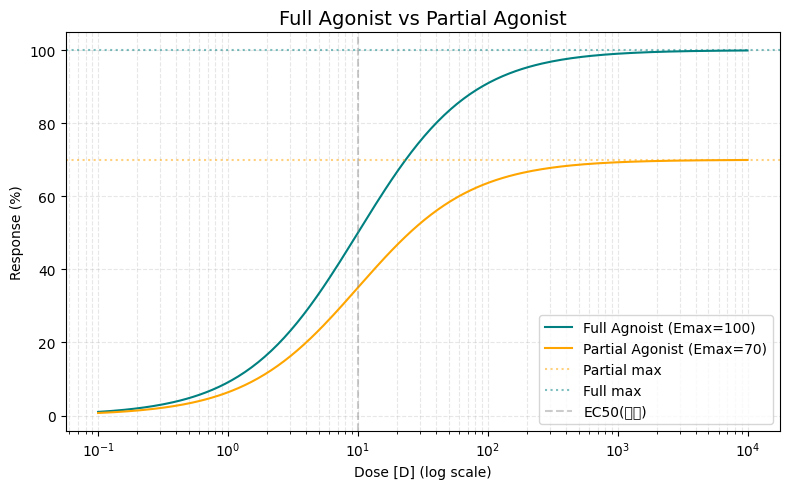

In [7]:
plt.figure(figsize=(8,5))
plt.semilogx(dose, response_full, label = 'Full Agnoist (Emax=100)', color='teal')
plt.semilogx(dose, response_partial, label = 'Partial Agonist (Emax=70)', color = 'orange')
plt.axhline(Emax_partial, color = 'orange', linestyle = ':', alpha=0.5, label='Partial max')
plt.axhline(Emax_full, color='teal', linestyle=':', alpha=0.5, label='Full max')
plt.axvline(EC50_full, color='gray', linestyle='--', alpha=0.4, label='EC50(공통)')

plt.title("Full Agonist vs Partial Agonist", fontsize=14)
plt.xlabel("Dose [D] (log scale)")
plt.ylabel("Response (%)")
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## ⚔️ Competitive Antagonist

- 작용제와 **같은 부위에 경쟁적으로 결합**
- **Emax는 유지**, **EC50이 증가** → potency 감소
- 그래프는 오른쪽으로 이동하지만 최고 반응은 유지됨

In [11]:
dose=np.logspace(-1, 4, 200)

#고정
Emax = 100
n=1
EC50_base = 10

#competitive antagonist에 따라 증가하는 EC50 값들
EC50_values = [10, 20, 40, 80]
colors=['teal', 'green', 'orange', 'red']

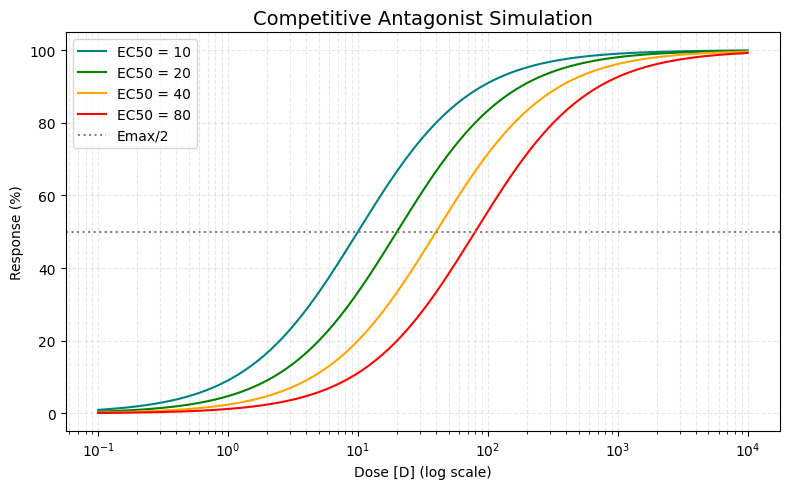

In [22]:
plt.figure(figsize=(8,5))

for ec50, color in zip(EC50_values, colors): #zip : 두 리스트를 함께 순회할 때
    response = hill_equation(dose, Emax, ec50, n)
    plt.semilogx(dose, response, label=f'EC50 = {ec50}', color= color)

plt.axhline(Emax/2, linestyle=':', color='gray', label='Emax/2')
plt.xlabel("Dose [D] (log scale)")
plt.ylabel("Response (%)")
plt.legend()
plt.title("Competitive Antagonist Simulation", fontsize=14)
plt.grid(True, which='both', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


## ❌ Noncompetitive Antagonist

- **수용체의 다른 부위에 비가역적으로 결합**
- **Emax가 감소**, EC50은 거의 일정
- 약물 농도를 높여도 최고 반응은 회복 불가능

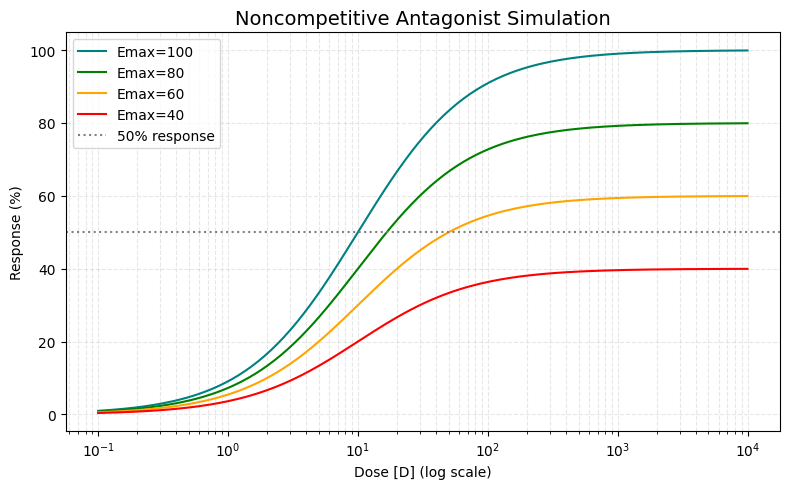

In [ ]:
dose= np.logspace(-1, 4, 200)
EC50=10
n=1

#비경쟁적 길항제 농도 증가에 따라 Emax 감소
Emax_values=[100, 80, 60, 40]
colors=['teal', 'green', 'orange', 'red']

plt.figure(figsize=(8,5))

for emax, color in zip(Emax_values, colors):
    response = hill_equation(dose, emax, EC50, n)
    plt.semilogx(dose, response, label=f'Emax={emax}', color=color)

plt.axhline(50, linestyle=':', color='gray', label='50% response')
plt.title("Noncompetitive Antagonist Simulation", fontsize=14)
plt.xlabel("Dose [D] (log scale)")
plt.ylabel("Response (%)")
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.3)
plt.tight_layout() #그래프 내 요소들이 겹치치 않게 자동정리 해줌
plt.show()

## ✅ 기술 스택

- Python (NumPy, Matplotlib)
- Jupyter Notebook
- ipywidgets (슬라이더 인터페이스)
- 로그 스케일 시각화 (`plt.semilogx`)